In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [146]:
conda update seaborn

Solving environment: ...working... 

Updating seaborn is constricted by 

anaconda -> requires seaborn==0.10.1=py_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.4|     pyhd3eb1b0_0           9 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    conda-package-handling-1.7.3|   py38h8cc25b3_1         721 KB
    nb_conda_kernels-2.3.1     |   py38haa95532_0          28 KB
    ------------------------------------------------------------
                                           Total

In [157]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Import of the train:

In [2]:
import os

# Import all Spontan files and their unification
spontan_df = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\\Evyatar636771052727603804Spontan.csv") # Import one file to which the other files will be attached
spontan_df = spontan_df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
spontan_df = spontan_df[spontan_df.hands == 2] # Leave only the rows that have 2 hands
spontan_df = pd.merge(spontan_df[spontan_df.Hand_Type == 'left'], spontan_df[spontan_df.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left

spontan = os.listdir("C:\\Users\\User\\Downloads\\dataset\\‏‏Training2\\spontan") # An array of all the names of the files to be imported
# A loop that adds the additional files to the first file I imported:
for i in spontan:
    df = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\\spontan\\" + i) # Import one file
    df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
    df = df[df.hands == 2] # Leave only the rows that have 2 hands
    df = pd.merge(df[df.Hand_Type == 'left'], df[df.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left
    spontan_df = pd.concat([spontan_df, df]) # Add the file to the other files in the data frame
    
spontan_df = spontan_df.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1)   # Delete ineffective columns
 
spontan_df['key'] = np.arange(1,33410)
spontan_df = spontan_df[spontan_df['key']%5 == 0]  # Leave only every fifth line of the data
spontan_df['key'] = np.arange(1,6682)

# Dividing the data into 3 Data Frame:
spontan_df0 = spontan_df[spontan_df['key']%3 == 0]
spontan_df0['key'] = np.arange(1,2228)

spontan_df1 = spontan_df[spontan_df['key']%3 == 1]
spontan_df1['key'] = np.arange(1,2228)

spontan_df2 = spontan_df[spontan_df['key']%3 == 2]
spontan_df2['key'] = np.arange(1,2228)

# unification of the three data frames:
spontan_df = pd.merge(spontan_df0, spontan_df1, how='inner', on=['key'])
spontan_df = pd.merge(spontan_df, spontan_df2, how='inner', on=['key'])

spontan_df = spontan_df.drop(columns=['key'])

spontan_df['label'] = 0  # Adding a label 0 (Spontan)

spontan_df

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0          -107.21000         204.6832       -34.227330        -17.01570   
1          -113.62050         241.1725        -3.134627        -92.70270   
2          -101.58700         175.3763        31.843530         85.44238   
3           -75.37846         114.4238         4.754050        105.41740   
4           -64.00463         154.7912       -50.652850        -55.95282   
...               ...              ...              ...              ...   
2222        -97.30035         194.9808        42.124620         36.63983   
2223        -71.65579         172.7482        14.149010         50.72947   
2224       -121.17300         224.3923        24.935150       -104.97170   
2225        -95.81244         209.7368        20.059130       -106.30860   
2226        -93.01819         221.5837        37.953460         93.66040   

       Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0           256.93400        81.845020    1.167691   0.630205  1.217462   
1           119.53620       180.366500    1.426920   0.663062  1.452297   
2          -318.80600        34.822910    1.300191   0.503228  1.409714   
3           -52.92049      -245.689100    0.562058   0.481479  0.981195   
4           443.91560       -68.489860    0.722181   0.659460  0.811813   
...               ...              ...         ...        ...       ...   
2222        -46.27446       -90.560020    1.229366   1.729568 -0.182003   
2223        155.50420        31.566880    0.321183   2.452310  0.728197   
2224        161.86870         6.146432    1.116468   1.881800 -0.090058   
2225         67.25564        70.615330    1.223910   1.290805  0.289268   
2226       -705.10900       -58.953580    1.390923   1.208312  1.025598   

       Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0            -161.1377  ...        183.7722        160.8939       -11.87658   
1            -169.8168  ...        185.6356        168.0082        19.39024   
2            -165.7070  ...        175.3179        143.8568        24.95718   
3            -137.1051  ...        175.2722        127.1645       -26.27252   
4            -114.3447  ...        177.8433        171.2971       -10.20424   
...                ...  ...             ...             ...             ...   
2222         -100.4523  ...        222.5971        168.2840       103.06290   
2223         -119.5616  ...        211.5432        159.0889       168.55010   
2224         -125.4870  ...        215.9527        172.7036        32.82088   
2225         -115.8233  ...        187.6964        153.8661       130.54080   
2226         -122.3104  ...        195.2263        151.2613        71.72637   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0           254.7479      -57.252240        95.09887          0.00000   
1           283.8770       -7.250923       173.34450          0.29216   
2           349.7360       66.490170       191.27540          0.00000   
3           238.8995        8.918169       188.32030          0.00000   
4           269.1360       -5.396811       145.82000          0.00000   
...              ...             ...             ...              ...   
2222        435.7434       19.942870        99.47561          0.04407   
2223        413.3796        6.486939       110.03510          0.00000   
2224        388.0115       10.299600       138.48640          0.00000   
2225        388.3647       -8.754124       110.63080          0.00000   
2226        438.9828      105.613000       146.48070          0.00000   

       Grab Angle_y   Pinch Strength_y  label  
0          1.000203           0.000000      0  
1          1.263965           0.000000      0  
2          0.836399           0.000000      0  
3          0.000000           0.000000      0  
4          0.000000           0.000000      0  
...             ...                ...    ...  
2222       0.749328           0

In [3]:
# Import all Alone files and their unification
right = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\\HandRight.csv") # Import of the file of the right hands
right = right.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
right = right[right.Hand_Type == 'right'] # Leave only what is in the right hand
right = right.drop(columns=['Time', 'Frame_ID', 'hands']) # Delete the irrelevant columns
right = right.dropna(axis = 'rows') # Deletes rows with NaN values
df = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\\Revital636770955999435879Alone.csv") # Import one file to which the other files will be attached
df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
df = df[df.Hand_Type == 'left'] # Leave only what is in the left hand
alone_df = pd.merge(df, right, left_index=True, right_index=True, how='right') # Connecting the rows of the right hands with the rows of the left

alone = os.listdir("C:\\Users\\User\\Downloads\\dataset\\‏‏Training2\\alone") # An array of all the names of the files to be imported
# A loop that adds the additional files to the first file I imported:
for i in alone:
    df = pd.read_csv(r"C:\\Users\\User\\Downloads\\dataset\\‏‏Training2\\alone\\" + i) # Import one file
    df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
    df = df[df.Hand_Type == 'left'] # Leave only what is in the left hand
    df = pd.merge(df, right, left_index=True, right_index=True, how='left')  # Connecting the rows of the right hands with the rows of the left
    alone_df = pd.concat([alone_df, df])  # Add the file to the other files in the data frame

alone_df = alone_df.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1) # Leave only every fifth line of the data
alone_df = alone_df.dropna(axis = 'rows') # Deletes rows with NaN values

alone_df['key'] = np.arange(1,31614)
alone_df = alone_df[alone_df['key']%5 == 0] # Leave only every fifth line of the data
alone_df['key'] = np.arange(1,6323)

# Dividing the data into 3 Data Frame:
alone_df0 = alone_df[alone_df['key']%3 == 0]
alone_df0['key'] = np.arange(1,2108)

alone_df1 = alone_df[alone_df['key']%3 == 1]
alone_df1['key'] = np.arange(1,2109)

alone_df2 = alone_df[alone_df['key']%3 == 2]
alone_df2['key'] = np.arange(1,2108)

# unification of the three data frames:
alone_df = pd.merge(alone_df0, alone_df1, how='inner', on=['key'])
alone_df = pd.merge(alone_df, alone_df2, how='inner', on=['key'])

alone_df = alone_df.drop(columns=['key'])

alone_df['label'] = 1  # Adding a label 1 (Alone)

alone_df

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0           -12.37000         282.6692        33.638770       -44.387150   
1           -23.86505         337.3849        39.544470         7.171518   
2           -15.65101         341.1461        63.736150       106.355300   
3           -28.87801         285.2426        60.573540       -13.656410   
4           -24.29261         346.3205        67.533250       -27.475010   
...               ...              ...              ...              ...   
2102       -112.74460         212.9347         9.722668        77.695810   
2103       -109.45770         201.8599        10.154910      -401.874200   
2104       -101.06200         201.9107        34.230120      -120.913200   
2105       -110.68560         209.6540        28.026860      -110.537300   
2106       -128.36400         214.8594        16.649780        23.307610   

       Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0           237.14660         4.929570    0.189298   2.896565  0.937529   
1           140.00830        60.105820    0.399923   2.249113  1.174201   
2          -405.96350      -124.739400   -1.014165  -0.297321  1.236245   
3           -23.43654       -50.243200   -1.104405  -0.721712  1.099849   
4           170.32030        16.775040   -1.180470  -0.751609  1.245137   
...               ...              ...         ...        ...       ...   
2102        -57.59598        89.642560    0.984283   0.839631  0.944849   
2103        233.36320         1.446463    1.037312   1.248384  0.706018   
2104        115.07700        27.071060    1.095453   1.204365  0.790889   
2105         89.03648       118.772600    1.061072   1.298741  0.621035   
2106        -25.98819         8.854999    1.085907   1.478227  0.260722   

       Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0            -61.44553  ...       49.790550       201.85380        82.53721   
1            -83.02135  ...       50.211030       204.22190        85.91442   
2            -75.25710  ...       47.848660       214.99140        86.86800   
3            -77.82300  ...       38.604920       227.07970        37.48775   
4            -75.44733  ...       40.802310       224.43890        71.92008   
...                ...  ...             ...             ...             ...   
2102        -164.78180  ...       -6.871185       140.60360       106.59430   
2103        -145.48930  ...      -12.102620       147.46580       101.62280   
2104        -137.08560  ...        6.263391       173.48580       124.98930   
2105        -140.13100  ...       12.755610       126.19320       120.67090   
2106        -144.08250  ...       12.957310        91.02769       107.94170   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0         199.118100       32.015060        228.5434              0.0   
1         209.177400       47.909080        236.7628              0.0   
2         215.437500       62.728300        232.5652              0.0   
3         188.120400       88.765320        213.7926              0.0   
4         204.397900       86.591330        235.8267              0.0   
...              ...             ...             ...              ...   
2102       33.795820       -0.113173        339.5172              0.0   
2103        7.278435       32.935430        351.0497              0.0   
2104      124.962100       56.920250        344.1118              0.0   
2105       88.350020       92.863180        383.0959              0.0   
2106       74.569960       33.033340        369.7295              0.0   

       Grab Angle_y   Pinch Strength_y  label  
0          0.351661                0.0      1  
1          0.540782                0.0      1  
2          0.087232                0.0      1  
3          0.035556                0.0      1  
4          0.250262                0.0      1  
...             ...                ...    ...  
2102       0.193252            

In [4]:
# Import all Sync files and their unification
sync_df = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\\Evyatar636771053639929594Sync.csv") # Import one file to which the other files will be attached
sync_df = sync_df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
sync_df = sync_df[sync_df.hands == 2] # Leave only the rows that have 2 hands
sync_df = pd.merge(sync_df[sync_df.Hand_Type == 'left'], sync_df[sync_df.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left

# An array of all the names of the files to be imported:
sync = os.listdir("C:\\Users\\User\\Downloads\\dataset\\‏‏Training2\\sync")
# A loop that adds the additional files to the first file I imported:
for i in sync:
    df = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\sync\\" + i) # Import one file
    df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
    df = df[df.hands == 2] # Leave only the rows that have 2 hands
    df = pd.merge(df[df.Hand_Type == 'left'], df[df.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left
    sync_df = pd.concat([sync_df, df]) # Add the file to the other files in the data frame
    
sync_df = sync_df.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1) # Delete ineffective columns
 
sync_df['key'] = np.arange(1,33338)
sync_df = sync_df[sync_df['key']%5 == 0] # Dividing the data into 3 Data Frame:
sync_df['key'] = np.arange(1,6668)

sync_df0 = sync_df[sync_df['key']%3 == 0]
sync_df0['key'] = np.arange(1,2223)

sync_df1 = sync_df[sync_df['key']%3 == 1]
sync_df1['key'] = np.arange(1,2224)

sync_df2 = sync_df[sync_df['key']%3 == 2]
sync_df2['key'] = np.arange(1,2223)

# unification of the three data frames:
sync_df = pd.merge(sync_df0, sync_df1, how='inner', on=['key'])
sync_df = pd.merge(sync_df, sync_df2, how='inner', on=['key'])

sync_df = sync_df.drop(columns=['key'])

sync_df['label'] = 2  # Adding a label 2 (Sync)

sync_df2

Position X_x   Position Y_x   Position Z_x   Velocity X_x  \
9         -87.14106       242.3800     -41.691750     -59.516270   
24       -123.62620       281.8895      -3.312145     -29.559070   
39       -123.93620       216.4624      51.724500     -35.771180   
54        -97.62505       148.5851      38.352780     129.035000   
69        -76.34640       146.4687      -4.114829      88.586690   
...             ...            ...            ...            ...   
2177      -69.28851       155.9656     -18.179180       1.805767   
2192      -72.41612       195.1358      -3.856975      -5.759877   
2207      -77.29271       204.1386       0.998848      -5.796680   
2222      -67.22385       158.4772     -16.321950     -23.862550   
2237      -72.37782       148.7224     -28.706660     -57.681620   

       Velocity Y_x   Velocity Z_x   Pitch_x    Roll_x     Yaw_x  \
9         278.69920       68.98720  1.476057  0.923156  1.431217   
24       -171.41610      182.46030  1.391703  1.161674  1.185361   
39       -238.97810      186.45120  1.010765  1.122074  0.884889   
54       -281.60820     -214.62560  1.157514  0.952410  1.083772   
69        142.95960     -220.28010  1.349558  0.944221  1.242717   
...             ...            ...       ...       ...       ...   
2177       51.74993       36.05683  0.358920  2.019509  0.514502   
2192       68.40871       37.97738  1.008278  1.439004  0.576043   
2207      -14.45288      -16.69745  1.186731  1.428802  0.549388   
2222      -90.74328      -39.36870  0.363893  2.123478  0.544353   
2237       97.83202       64.35623  0.116348  2.247935  0.513304   

       Wrist Pos X_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
9          -131.6230  ...        108.5595        206.8734        0.010110   
24         -157.8827  ...        123.0561        246.2362       -4.808247   
39         -166.7752  ...        160.2234        182.9901       36.478890   
54         -144.3892  ...        169.4114        131.3445      113.991000   
69         -121.8712  ...        138.8452        126.4201       40.771290   
...              ...  ...             ...             ...             ...   
2177       -108.6405  ...        125.8027        143.6909       55.079440   
2192       -100.7913  ...        131.4008        148.1727       52.676380   
2207       -100.3461  ...        125.5140        141.1611       48.685200   
2222       -106.8652  ...        130.2215        148.2429       63.152830   
2237       -111.8147  ...        132.0905        152.1458       60.131420   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
9           265.4598       38.888590        92.31801              0.0   
24          284.3762       81.428090        85.58797              0.0   
39          331.9187       15.021710        97.01575              0.0   
54          354.6482       43.807110       253.20990              0.0   
69          302.9185      -27.006320       145.13180              0.0   
...              ...             ...             ...              ...   
2177        315.8134       10.495050       169.80350              0.0   
2192        295.2154      -50.025270        82.49553              0.0   
2207        301.3848      -48.734810        44.70853              0.0   
2222        327.1131        9.720168       158.29460              0.0   
2237        345.5084       46.910910       162.03940              0.0   

       Grab Angle_y   Pinch Strength_y   key  
9               0.0                0.0     1  
24              0.0                0.0     2  
39              0.0                0.0     3  
54              0.0                0.0     4  
69              0.0                0.0     5  
...             ...                ...   ...  
2177            0.0                0.0  2218  
2192            0.0                0.0  2219  
2207            0.0                0.0  2220  
2222            0.0                0.0  2221  
2237            0.0                0.0  2222  

[2222 

In [5]:
# Connection of 3 data frames to one:
train = pd.concat([spontan_df, alone_df])
train = pd.concat([train, sync_df])
# Mixing the lines of the data frame
train = train.sample(frac = 1)
train

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
632        -182.09860         234.6802        24.118650       -122.74490   
28          -19.47915         196.2870        59.243460        150.08390   
1286        -99.09935         136.4357        32.653460       -293.67160   
519        -103.99760         155.1738        70.049520         32.53814   
941        -205.00990         235.5857        32.179920       -294.83890   
...               ...              ...              ...              ...   
2096       -154.60220         270.6039        44.331010         42.49514   
919         -63.52993         177.7595        -4.841988         -4.33331   
1512       -106.18010         187.0282        -3.110328         48.23573   
1011        -98.31302         254.1205        90.818050       -131.62340   
718        -271.49110         258.9246        72.648290        -55.77269   

       Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
632         115.37590       154.333900    0.941112   1.620095  0.305232   
28         -325.44670       -36.331330    1.486283   1.362709  1.031746   
1286        -12.09353       148.708700    0.744500   0.487298  1.102567   
519         -58.79384       -38.627860    0.967647   0.293322  1.363588   
941         209.10160       105.543300    1.795210   1.746470 -2.296219   
...               ...              ...         ...        ...       ...   
2096        -28.38461       216.864400    1.031618  -3.104857  1.051458   
919         245.19070        -3.509623    1.400595   0.623424  1.438600   
1512        -46.48948      -141.292300    0.752878   1.954199 -0.363726   
1011        369.04720       138.357200    1.801627   0.762010  1.786203   
718          96.48362        18.162830    1.644071   1.039078  1.695897   

       Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
632         -200.86610  ...       106.50110        170.4623       68.552690   
28           -42.34761  ...        14.41864        265.2352      110.128100   
1286        -160.73950  ...       171.44400        114.5240        1.849397   
519         -173.58510  ...       193.41710        153.5668       56.249860   
941         -196.71870  ...        75.25906        193.1760      141.999000   
...                ...  ...             ...             ...             ...   
2096        -197.26700  ...       -23.04720        195.8831      125.882400   
919         -119.53030  ...       135.02840        120.2799       34.152630   
1512         -95.51786  ...       186.76240        187.3562       45.623990   
1011        -149.23120  ...       185.04610        167.1458       15.751260   
718         -312.45270  ...       179.53010        205.8617      121.787300   

       Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
632         251.2139       -14.25919       179.19670         0.000000   
28          156.2527       114.15000       285.50700         0.000000   
1286        337.4341       -52.86693        79.39874         0.000000   
519         403.8825        29.43611       136.63360         0.000000   
941         200.2208        72.11652       354.07790         0.000000   
...              ...             ...             ...              ...   
2096        147.1593       174.20180       341.14460         0.000000   
919         260.6233       -46.64078       154.17010         0.000000   
1512        363.4879        64.81689       157.19400         0.000000   
1011        316.2335       -15.65483       105.98430         0.000000   
718         363.2033        25.88407       132.28210         0.079314   

       Grab Angle_y   Pinch Strength_y  label  
632        0.148346                0.0      2  
28         0.021031                0.0      1  
1286       0.292720                0.0      2  
519        0.477288                0.0      0  
941        0.519674                0.0      1  
...             ...                ...    ...  
2096       0.238264            

# Import of the validation:

In [6]:
# Import the Spontan file
spontan_df4 = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\validation\\Yael636771059544754823Spontan.csv") # Import of the file
spontan_df4 = spontan_df4.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
spontan_df4 = spontan_df4[spontan_df4.hands == 2] # Leave only the rows that have 2 hands
spontan_df4 = pd.merge(spontan_df4[spontan_df4.Hand_Type == 'left'], spontan_df4[spontan_df4.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left
    
spontan_df4 = spontan_df4.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1)   # Delete ineffective columns
 
spontan_df4['key'] = np.arange(1,4247)
spontan_df4 = spontan_df4[spontan_df4['key']%5 == 0]  # Leave only every fifth line of the data
spontan_df4['key'] = np.arange(1,850)

# Dividing the data into 3 Data Frame:
spontan_df0 = spontan_df4[spontan_df4['key']%3 == 0]
spontan_df0['key'] = np.arange(1,284)

spontan_df1 = spontan_df4[spontan_df4['key']%3 == 1]
spontan_df1['key'] = np.arange(1,284)

spontan_df2 = spontan_df4[spontan_df4['key']%3 == 2]
spontan_df2['key'] = np.arange(1,284)

# unification of the three data frames:
spontan_df4 = pd.merge(spontan_df0, spontan_df1, how='inner', on=['key'])
spontan_df4 = pd.merge(spontan_df4, spontan_df2, how='inner', on=['key'])

spontan_df4 = spontan_df4.drop(columns=['key'])

spontan_df4['label'] = 0  # Adding a label 0 (Spontan)

spontan_df4

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0          -178.8141         252.0891        105.20730       172.222500   
1          -145.8471         204.7023        100.95240        27.704790   
2          -156.4933         173.7704         81.89981      -246.296200   
3          -156.2028         170.4713         59.59501        32.661450   
4          -161.3281         206.4227         48.14096       -56.302250   
..               ...              ...              ...              ...   
278        -188.5477         178.5215        -80.47675         7.652399   
279        -195.1869         179.0488        -75.47969         7.315432   
280        -195.7487         177.5547        -77.57187       -30.913660   
281        -200.4705         188.7898        -84.36340        15.185740   
282        -183.6162         166.2290        -70.81329       -68.142180   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0           8.884947         9.310522    1.592371   1.316662  1.654195   
1        -252.095800       -42.061410    1.696773   0.256787  1.603988   
2        -112.452600       -60.327840   -0.343439  -0.150551  1.245455   
3         112.509100      -136.045100    0.257646   0.234870  0.758676   
4         117.530400        83.412450    0.958390   0.803677  0.667091   
..               ...              ...         ...        ...       ...   
278        89.903360        24.928740    1.263700   0.959852  0.989581   
279       -48.271500        -2.597266    1.209499   1.028613  0.751431   
280        50.613850       -44.799390    1.242498   1.101523  0.745500   
281        17.904930        -7.484942    1.256744   1.114897  0.748096   
282       149.328800      -127.051700    1.260310   1.072982  0.383668   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0           -200.3390  ...        186.3692        141.1890       14.294900   
1           -209.5401  ...        186.9772        154.6463        8.784088   
2           -222.6433  ...        191.7402        228.3896      -28.648810   
3           -210.8181  ...        202.9463        283.6656      -29.654290   
4           -198.6672  ...        218.5929        223.9605      -14.921280   
..                ...  ...             ...             ...             ...   
278         -221.4568  ...        192.8827        149.2715      -17.661510   
279         -222.5759  ...        215.1593        188.9359        2.927825   
280         -220.0634  ...        210.5035        191.6221       16.049720   
281         -224.8957  ...        213.8549        178.5610       19.170250   
282         -198.4732  ...        209.4844        192.9989       13.114510   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0          339.3106        26.26624       170.95920         0.000000   
1          332.1858        90.45202       198.35090         0.000000   
2          328.2532        44.27800        64.69485         0.000000   
3          332.7588        90.19146        54.03187         0.177827   
4          355.0616        41.60663        82.39489         0.000000   
..              ...             ...             ...              ...   
278        301.5033         4.34831       152.89670         0.000000   
279        280.1073       -23.35101       115.21010         0.000000   
280        304.8320       -25.19101        93.41566         0.000000   
281        407.4344        79.91879       140.36430         0.000000   
282        298.7966       -14.30074       117.71590         0.000000   

      Grab Angle_y   Pinch Strength_y  label  
0         0.307641                0.0      0  
1         0.290688                0.0      0  
2         0.938504                0.0      0  
3         1.298948                0.0      0  
4         0.681547                0.0      0  
..             ...                ...    ...  
278       0.054531                0.0      0  
279       0.314445                0.0 

In [7]:
# Import the Alone file
alone_df4 = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\validation\\Yael636771061659067649Alone.csv") # Import of the file
alone_df4 = alone_df4.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
alone_df4 = alone_df4[alone_df4.Hand_Type == 'left'] # Leave only what is in the left hand
alone_df4 = pd.merge(alone_df4, right, left_index=True, right_index=True, how='right') # Connecting the rows of the right hands with the rows of the left

alone_df4 = alone_df4.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1) # Leave only every fifth line of the data
alone_df4 = alone_df4.dropna(axis = 'rows') # Deletes rows with NaN values

alone_df4['key'] = np.arange(1,4304)
alone_df4 = alone_df4[alone_df4['key']%5 == 0] # Leave only every fifth line of the data
alone_df4['key'] = np.arange(1,861)

# Dividing the data into 3 Data Frame:
alone_df0 = alone_df4[alone_df4['key']%3 == 0]
alone_df0['key'] = np.arange(1,287)

alone_df1 = alone_df4[alone_df4['key']%3 == 1]
alone_df1['key'] = np.arange(1,288)

alone_df2 = alone_df4[alone_df4['key']%3 == 2]
alone_df2['key'] = np.arange(1,288)

# unification of the three data frames:
alone_df4 = pd.merge(alone_df0, alone_df1, how='inner', on=['key'])
alone_df4 = pd.merge(alone_df4, alone_df2, how='inner', on=['key'])

alone_df4 = alone_df4.drop(columns=['key'])

alone_df4['label'] = 1  # Adding a label 1 (Alone)

alone_df4

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0         -161.72730        350.33670        -9.590730        94.368500   
1         -155.94470        322.61400        -4.853141       -34.917200   
2         -146.51100        201.47190       -11.388430       108.331700   
3         -113.96580        117.19840        -7.638002       241.998300   
4          -90.43680         50.26426         8.535815       162.752300   
..               ...              ...              ...              ...   
281        -98.35098        231.74070       -56.484110         9.477708   
282        -98.03461        222.97630       -53.527910         9.896276   
283       -104.35070        212.77150       -64.703110       -28.536510   
284       -113.23410        185.03050       -69.588960      -205.947100   
285       -114.26000        174.85820       -76.334860       -23.507040   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0          74.613060        28.888200    1.536424   1.055394  1.507249   
1        -331.147000        -9.966821    1.339957   0.936112  1.210394   
2        -443.699200       -30.256090    1.222655   1.007829  1.007373   
3        -468.152500        57.703300    1.159317   0.922344  1.047596   
4         -18.970460       -79.945300    1.563324   2.426969 -1.564335   
..               ...              ...         ...        ...       ...   
281       -76.514920         3.804552    0.905359   0.353732  0.949756   
282       -11.242980        -7.534871    0.796798   0.193413  0.955018   
283       -84.205710       -77.257680    0.491444  -0.006531  0.771544   
284       -65.185490         8.333384    0.274324  -0.012878  0.592606   
285        -3.732516       -45.546550    0.214251   0.081302  0.523005   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0          -200.29970  ...       49.790550       201.85380        82.53721   
1          -197.01680  ...       50.211030       204.22190        85.91442   
2          -185.39780  ...       47.848660       214.99140        86.86800   
3          -159.19230  ...       38.604920       227.07970        37.48775   
4           -54.48639  ...       40.802310       224.43890        71.92008   
..                ...  ...             ...             ...             ...   
281        -148.29190  ...      -58.500710       415.78630       111.38700   
282        -149.86870  ...       -8.804513       161.04250       104.09090   
283        -153.46780  ...       11.196950       210.72270        88.67811   
284        -153.94490  ...        1.038704       293.53750       122.64320   
285        -152.58250  ...       37.288040        85.10158       103.24710   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0         199.11810        32.01506        228.5434         0.000000   
1         209.17740        47.90908        236.7628         0.000000   
2         215.43750        62.72830        232.5652         0.000000   
3         188.12040        88.76532        213.7926         0.000000   
4         204.39790        86.59133        235.8267         0.000000   
..              ...             ...             ...              ...   
281        83.41763       261.72010        286.2480         0.000000   
282       134.16900        91.52668        325.2090         0.000000   
283       148.62950        95.21421        293.4484         0.041504   
284       140.01760       139.20500        298.3682         0.000000   
285       104.41540        32.73103        361.5134         0.000000   

      Grab Angle_y   Pinch Strength_y  label  
0         0.351661                0.0      1  
1         0.540782                0.0      1  
2         0.087232                0.0      1  
3         0.035556                0.0      1  
4         0.250262                0.0      1  
..             ...                ...    ...  
281       0.661253                0.0      1  
282       0.734746                0.0 

In [8]:
# Import the Sync file
sync_df4 = pd.read_csv(r"C:\Users\User\Downloads\dataset\‏‏Training2\\validation\\Yael636771060699529085Sync.csv") # Import of the file
sync_df4 = sync_df4.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
sync_df4 = sync_df4[sync_df4.hands == 2] # Leave only the rows that have 2 hands
sync_df4 = pd.merge(sync_df4[sync_df4.Hand_Type == 'left'], sync_df4[sync_df4.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left
    
sync_df4 = sync_df4.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1) # Delete ineffective columns
 
sync_df4['key'] = np.arange(1,4303)
sync_df4 = sync_df4[sync_df4['key']%5 == 0] # Dividing the data into 3 Data Frame:
sync_df4['key'] = np.arange(1,861)

sync_df0 = sync_df4[sync_df4['key']%3 == 0]
sync_df0['key'] = np.arange(1,287)

sync_df1 = sync_df4[sync_df4['key']%3 == 1]
sync_df1['key'] = np.arange(1,288)

sync_df2 = sync_df4[sync_df4['key']%3 == 2]
sync_df2['key'] = np.arange(1,288)

# unification of the three data frames:
sync_df4 = pd.merge(sync_df0, sync_df1, how='inner', on=['key'])
sync_df4 = pd.merge(sync_df4, sync_df2, how='inner', on=['key'])

sync_df4 = sync_df4.drop(columns=['key'])

sync_df4['label'] = 2  # Adding a label 2 (Sync)

sync_df4

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0          -111.8764         214.4653        -3.707601       -67.460430   
1          -122.6356         190.1915         0.101321         1.670765   
2          -120.6284         209.8287        -1.421531       -10.417170   
3          -118.8711         233.7914        30.631940         3.721586   
4          -113.1445         229.6057        43.119770        76.006800   
..               ...              ...              ...              ...   
281        -131.2014         141.8158       -22.201450        52.899460   
282        -119.4086         180.4874       -66.031070        28.038460   
283        -122.3226         230.6010       -78.214860       -36.410390   
284        -130.8762         209.4762       -53.611330       -45.906200   
285        -132.1392         195.5631       -58.336950        41.810560   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0          -97.79838       -52.150780    1.042825   1.582873  0.491282   
1          -71.94791         2.758883    0.712363   2.203552  0.697417   
2           80.87061       101.213500    0.819413   1.592975  0.468640   
3          -18.16581       175.189000    1.413226   1.534349  0.298561   
4         -106.12860      -101.613500    1.577704   1.554805  2.014382   
..               ...              ...         ...        ...       ...   
281        133.59280      -211.249700    0.674850   1.696091  0.542343   
282        271.53910      -166.077600    0.683196   1.675374  0.399621   
283         38.37028        45.888600    0.743306   1.724574  0.273855   
284        -22.21453        30.654410    0.873621   1.679418  0.357498   
285       -267.05570       -21.104160    0.889201   1.618217  0.350517   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0           -135.4089  ...        91.18050        131.1711        4.012433   
1           -161.6289  ...        92.30558        129.2602       31.517370   
2           -149.8367  ...       102.32270        132.5087       53.905240   
3           -130.1077  ...        94.15427        134.0832       15.897940   
4           -121.9205  ...        97.08121        127.0979        7.212306   
..                ...  ...             ...             ...             ...   
281         -163.6360  ...       116.27820        140.2386       36.323010   
282         -146.5297  ...        63.89499        155.2009        0.077492   
283         -142.9252  ...        56.97569        170.4079      -16.963500   
284         -153.1235  ...        76.13367        171.0984      -29.900930   
285         -153.7689  ...       118.01770        148.1684      -15.528620   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0          216.5016       -85.76240        25.40938              0.0   
1          239.1838       -71.44337        68.50662              0.0   
2          264.4748       -20.49932       170.17450              0.0   
3          233.0605       -70.25111        62.54430              0.0   
4          234.1600       -83.00230        24.26059              0.0   
..              ...             ...             ...              ...   
281        314.1382        20.57578       130.22510              0.0   
282        250.7261        18.40677        93.17372              0.0   
283        243.0582        44.53540        91.73246              0.0   
284        246.2746        19.86723        72.40533              0.0   
285        257.1148       -36.04729        79.35020              0.0   

      Grab Angle_y   Pinch Strength_y  label  
0         0.000000                0.0      2  
1         0.000000                0.0      2  
2         0.000000                0.0      2  
3         0.037490                0.0      2  
4         0.047967                0.0      2  
..             ...                ...    ...  
281       0.000000                0.0      2  
282       0.000000                0.0 

In [9]:
# Connection of 3 data frames to one:
validation = pd.concat([spontan_df4, alone_df4])
validation = pd.concat([validation, sync_df4])
# Mixing the lines of the data frame
validation = validation.sample(frac = 1)
validation

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
14        -146.91870         158.5753      -110.009100       158.779300   
217       -204.20820         216.1890        34.661670        39.445670   
257       -157.21970         141.6136        -2.711359        -7.967297   
175        -98.59704         239.6798      -102.944400        54.335950   
165       -207.04190         179.8805        67.800060       237.075700   
..               ...              ...              ...              ...   
68         -90.26561         127.1049       -62.768900        31.211670   
64        -186.76060         220.7491       -89.356580        42.438600   
141       -125.90920         238.3788      -109.005000        98.512220   
167       -170.53280         259.8978       -24.077960      -102.927800   
18        -136.51630         178.1034      -110.790700        19.664710   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
14        -56.552630      -126.426200    1.152296   0.772361  0.634747   
217       -61.566690        -2.308833    0.998520   0.725295  0.905360   
257      -113.343200       -49.758370    1.189174   1.433828  0.532431   
175      -221.839000        43.329620    1.282188   0.455654  1.422891   
165      -207.666000      -117.944900    1.738106   1.250445  2.110132   
..               ...              ...         ...        ...       ...   
68         64.165570      -159.416100    0.501861   1.848295  0.241128   
64        -96.507440        36.555060    1.110575   0.887234  0.895081   
141       210.197500      -157.798100    0.937964   0.491936  0.803351   
167       174.947200        32.883620    1.354560   0.992232  1.246833   
18          9.721814       -41.626180    1.203303   0.841519  0.818466   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
14          -170.6455  ...       -1.888383        172.2251       67.130270   
217         -250.7390  ...      211.059500        198.6431       61.502410   
257         -176.5346  ...      198.506300        168.8742       -1.519918   
175         -160.8743  ...       20.473360        178.6250      186.500700   
165         -229.3817  ...      192.990200        231.6341        4.917344   
..                ...  ...             ...             ...             ...   
68          -112.4719  ...      145.429400        120.3237       18.398560   
64          -222.7149  ...      -30.003100        152.8287      111.803900   
141         -166.3720  ...       16.654040        159.7955      118.626700   
167         -211.6405  ...      179.988800        278.3277      -57.151080   
18          -165.5781  ...       29.755800        184.9176       75.616230   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
14         163.9169       41.501080       235.97760              0.0   
217        320.6234       -7.247108       146.16200              0.0   
257        316.9261      -45.587360        45.99729              0.0   
175        199.9428       17.264600       312.96460              0.0   
165        391.3533      109.247200        90.90903              0.0   
..              ...             ...             ...              ...   
68         301.9773      -16.956530       160.37340              0.0   
64         132.6195       48.306640       303.72260              0.0   
141        124.1176        6.991455       320.64290              0.0   
167        326.5305       92.241900        17.39424              0.0   
18         141.7604       51.650680       282.91260              0.0   

      Grab Angle_y   Pinch Strength_y  label  
14        0.124059                0.0      1  
217       0.000000                0.0      0  
257       1.064600                0.0      2  
175       0.069125                0.0      1  
165       0.587126                0.0      0  
..             ...                ...    ...  
68        0.000000                0.0      2  
64        0.190646                0.0 

# Import of the test:

In [10]:
# Import all Spontan files and their unification
spontan_df5 = pd.read_csv(r"C:\Users\User\Downloads\dataset\Validation\\Itiel636770940701219076Spontan.csv") # Import one file to which the other files will be attached
spontan_df5 = spontan_df5.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
spontan_df5 = spontan_df5[spontan_df5.hands == 2] # Leave only the rows that have 2 hands
spontan_df5 = pd.merge(spontan_df5[spontan_df5.Hand_Type == 'left'], spontan_df5[spontan_df5.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left

spontan = os.listdir("C:\\Users\\User\\Downloads\\dataset\\Validation\\spontan") # An array of all the names of the files to be imported
# A loop that adds the additional files to the first file I imported:
for i in spontan:
    df = pd.read_csv(r"C:\Users\User\Downloads\dataset\Validation\\spontan\\" + i) # Import one file
    df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
    df = df[df.hands == 2] # Leave only the rows that have 2 hands
    df = pd.merge(df[df.Hand_Type == 'left'], df[df.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left
    spontan_df5 = pd.concat([spontan_df5, df]) # Add the file to the other files in the data frame
    
spontan_df5 = spontan_df5.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1)   # Delete ineffective columns
 
spontan_df5['key'] = np.arange(1,11154)
spontan_df5 = spontan_df5[spontan_df5['key']%5 == 0]  # Leave only every fifth line of the data
spontan_df5['key'] = np.arange(1,2231)

# Dividing the data into 3 Data Frame:
spontan_df0 = spontan_df5[spontan_df5['key']%3 == 0]
spontan_df0['key'] = np.arange(1,744)

spontan_df1 = spontan_df5[spontan_df5['key']%3 == 1]
spontan_df1['key'] = np.arange(1,745)

spontan_df2 = spontan_df5[spontan_df5['key']%3 == 2]
spontan_df2['key'] = np.arange(1,744)

# unification of the three data frames:
spontan_df5 = pd.merge(spontan_df0, spontan_df1, how='inner', on=['key'])
spontan_df5 = pd.merge(spontan_df5, spontan_df2, how='inner', on=['key'])

spontan_df5 = spontan_df5.drop(columns=['key'])

spontan_df5['label'] = 0  # Adding a label 0 (Spontan)

spontan_df5

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0          -193.6931         301.0938         77.36354       -62.340320   
1          -195.3630         305.6737         76.63700         5.066783   
2          -196.3303         320.6642         61.61355       -78.557850   
3          -195.7403         315.1153         54.85480         1.292336   
4          -193.5843         310.4260         54.10988        -2.595422   
..               ...              ...              ...              ...   
738        -115.7097         250.4847         65.81123       -53.146990   
739        -165.4176         230.0387        101.34950       -94.068710   
740        -116.3595         188.6466         63.08131       209.582200   
741        -109.3008         236.8322         93.85016       -71.777440   
742        -123.1295         272.3911        101.08500        14.274890   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0          -0.919793        72.507530    1.102816   0.257694  1.429557   
1          40.297020       -33.428870    1.104290   0.314383  1.415665   
2         115.674100       -30.770610    1.215666   0.756301  1.303381   
3         -17.050700         4.717221    1.274421   0.827118  1.323248   
4          -3.160758        -7.862030    1.294413   0.824532  1.333711   
..               ...              ...         ...        ...       ...   
738      -108.426100       137.297200    1.122802   0.761563  0.787352   
739        91.188210        -1.832060    0.469774   0.292493  0.875182   
740      -141.911700        92.332000    0.306353   2.220270  0.915748   
741       163.633400        39.436210    1.025255   2.444674  1.277970   
742         5.863417       -62.710400    0.899068   0.577044  0.758342   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0           -260.2125  ...        118.7270        179.2265      120.947300   
1           -260.5781  ...        143.8700        188.1566       35.498170   
2           -252.4610  ...        165.7813        211.8220       -0.583420   
3           -249.1819  ...        142.5772        292.7188        5.380737   
4           -246.8854  ...        147.8454        236.1737       25.023800   
..                ...  ...             ...             ...             ...   
738         -153.6982  ...        226.6603        156.6226       51.515530   
739         -224.2211  ...        183.0937        137.8042      105.151900   
740         -172.3881  ...        253.4224        204.8862       87.267020   
741         -168.0743  ...        266.2308        226.6262      155.207800   
742         -169.5224  ...        230.7860        191.8958       65.488300   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0          349.7208       91.602600       132.49180         0.000000   
1          338.6301       48.312440        97.34203         0.000000   
2          307.1803       51.736310       125.62580         0.000000   
3          268.2464       98.724140        96.05383         0.000000   
4          288.2023       75.968170       152.76030         0.000000   
..              ...             ...             ...              ...   
738        318.5146       -3.855868       233.92230         0.000000   
739        350.1711       71.009890       292.46560         0.000000   
740        369.3734      -26.467240       109.10600         0.027049   
741        420.5354       17.811550       147.18640         0.000000   
742        335.2623      -45.109540        84.95040         0.000000   

      Grab Angle_y   Pinch Strength_y  label  
0         0.356022                0.0      0  
1         0.527045                0.0      0  
2         0.477244                0.0      0  
3         0.459018                0.0      0  
4         0.321010                0.0      0  
..             ...                ...    ...  
738       0.541572                0.0      0  
739       0.050033                0.0 

In [11]:
# Import all Alone files and their unification
alone_df5 = pd.read_csv(r"C:\Users\User\Downloads\dataset\Validation\\Itiel636770942529041679Alone.csv") # Import one file to which the other files will be attached
alone_df5 = alone_df5.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
alone_df5 = alone_df5[alone_df5.Hand_Type == 'left'] # Leave only what is in the left hand
alone_df5 = pd.merge(alone_df5, right, left_index=True, right_index=True, how='right') # Connecting the rows of the right hands with the rows of the left

alone = os.listdir("C:\\Users\\User\\Downloads\\dataset\\Validation\\alone") # An array of all the names of the files to be imported
# A loop that adds the additional files to the first file I imported:
for i in alone:
    df = pd.read_csv(r"C:\\Users\\User\\Downloads\\dataset\\Validation\\alone\\" + i) # Import one file
    df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
    df = df[df.Hand_Type == 'left'] # Leave only what is in the left hand
    df = pd.merge(df, right, left_index=True, right_index=True, how='left')  # Connecting the rows of the right hands with the rows of the left
    alone_df5 = pd.concat([alone_df5, df])  # Add the file to the other files in the data frame

alone_df5 = alone_df5.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1) # Leave only every fifth line of the data
alone_df5 = alone_df5.dropna(axis = 'rows') # Deletes rows with NaN values

alone_df5['key'] = np.arange(1,10604)
alone_df5 = alone_df5[alone_df5['key']%5 == 0] # Leave only every fifth line of the data
alone_df5['key'] = np.arange(1,2121)

# Dividing the data into 3 Data Frame:
alone_df0 = alone_df5[alone_df5['key']%3 == 0]
alone_df0['key'] = np.arange(1,707)

alone_df1 = alone_df5[alone_df5['key']%3 == 1]
alone_df1['key'] = np.arange(1,708)

alone_df2 = alone_df5[alone_df5['key']%3 == 2]
alone_df2['key'] = np.arange(1,708)

# unification of the three data frames:
alone_df5 = pd.merge(alone_df0, alone_df1, how='inner', on=['key'])
alone_df5 = pd.merge(alone_df5, alone_df2, how='inner', on=['key'])

alone_df5 = alone_df5.drop(columns=['key'])

alone_df5['label'] = 1  # Adding a label 1 (Alone)

alone_df5

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0         -93.108440         208.0620         72.94209       -67.965070   
1        -128.195000         246.2458         51.80216       -78.242780   
2         -94.413240         302.8997         66.32568       144.369600   
3         -57.483020         262.9528         96.12489       144.599400   
4          -8.369073         208.9791        127.43660       371.907300   
..               ...              ...              ...              ...   
701       -83.999320         327.7724         35.64857         7.198792   
702       -61.655120         334.4554         43.16432        45.429210   
703       -41.630260         317.3832         52.24089       -49.821380   
704       -26.710390         295.4025         54.86127        32.016020   
705       -38.686790         298.9092         62.86468       -56.399290   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0         170.627000         60.40674    1.251415  -3.104317  1.407547   
1         319.443700       -101.89450    1.213191   1.591761  1.104960   
2         -47.362730        143.98700    1.405766   0.452031  1.488201   
3        -339.187700         78.51445   -1.831170  -0.285720  1.650089   
4        -151.206700        138.61690    2.206044  -1.876397  1.809662   
..               ...              ...         ...        ...       ...   
701        -9.107235          9.55529    0.584077   2.141395  0.642708   
702        22.855330         42.77046    0.622357   0.759120  0.886309   
703       -54.107020         17.26069   -0.237842  -0.100511  0.984036   
704       -10.398510         13.03996   -0.027311  -0.134547  1.041258   
705      -110.502900         21.43307    0.995335   0.222574  1.122177   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0          -149.55380  ...       49.790550       201.85380        82.53721   
1          -164.06690  ...       50.211030       204.22190        85.91442   
2          -154.64980  ...       47.848660       214.99140        86.86800   
3          -120.59190  ...       38.604920       227.07970        37.48775   
4           -67.45438  ...       40.802310       224.43890        71.92008   
..                ...  ...             ...             ...             ...   
701        -123.00920  ...       -0.314794       145.68760       110.61150   
702        -119.04010  ...      -15.839640       142.55660       103.34970   
703        -106.88430  ...        3.912291       170.57700       117.08370   
704         -93.36195  ...       13.064060       158.68520       127.78030   
705         -98.26196  ...       13.586400        78.92649       109.73980   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0        199.118100       32.015060        228.5434              0.0   
1        209.177400       47.909080        236.7628              0.0   
2        215.437500       62.728300        232.5652              0.0   
3        188.120400       88.765320        213.7926              0.0   
4        204.397900       86.591330        235.8267              0.0   
..              ...             ...             ...              ...   
701       54.862150       49.896730        362.5792              0.0   
702        7.886678       10.718520        343.6772              0.0   
703      116.363000       35.602240        328.8460              0.0   
704      109.666100       80.658430        373.2934              0.0   
705       63.341860        1.169062        368.9125              0.0   

      Grab Angle_y   Pinch Strength_y  label  
0         0.351661                0.0      1  
1         0.540782                0.0      1  
2         0.087232                0.0      1  
3         0.035556                0.0      1  
4         0.250262                0.0      1  
..             ...                ...    ...  
701       0.133961                0.0      1  
702       0.244841                0.0 

In [12]:
# Import all Sync files and their unification
sync_df5 = pd.read_csv(r"C:\Users\User\Downloads\dataset\Validation\\Itiel636770941638547912Sync.csv") # Import one file to which the other files will be attached
sync_df5 = sync_df5.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
sync_df5 = sync_df5[sync_df5.hands == 2] # Leave only the rows that have 2 hands
sync_df5 = pd.merge(sync_df5[sync_df5.Hand_Type == 'left'], sync_df5[sync_df5.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left

# An array of all the names of the files to be imported:
sync = os.listdir("C:\\Users\\User\\Downloads\\dataset\\Validation\\sync")
# A loop that adds the additional files to the first file I imported:
for i in sync:
    df = pd.read_csv(r"C:\Users\User\Downloads\dataset\Validation\sync\\" + i) # Import one file
    df = df.rename(columns={' Hand Type': 'Hand_Type', ' Frame ID': 'Frame_ID', ' # hands': 'hands'})
    df = df[df.hands == 2] # Leave only the rows that have 2 hands
    df = pd.merge(df[df.Hand_Type == 'left'], df[df.Hand_Type == 'right'], how='inner', on=['Time','Frame_ID', 'hands']) # Connecting the rows of the right hands with the rows of the left
    sync_df5 = pd.concat([sync_df5, df]) # Add the file to the other files in the data frame
    
sync_df5 = sync_df5.drop(['Time', 'Frame_ID', 'Hand_Type_x', 'hands', 'Hand_Type_y'], axis=1) # Delete ineffective columns
 
sync_df5['key'] = np.arange(1,11017)
sync_df5 = sync_df5[sync_df5['key']%5 == 0] # Dividing the data into 3 Data Frame:
sync_df5['key'] = np.arange(1,2204)

sync_df0 = sync_df5[sync_df5['key']%3 == 0]
sync_df0['key'] = np.arange(1,735)

sync_df1 = sync_df5[sync_df5['key']%3 == 1]
sync_df1['key'] = np.arange(1,736)

sync_df2 = sync_df5[sync_df5['key']%3 == 2]
sync_df2['key'] = np.arange(1,735)

# unification of the three data frames:
sync_df5 = pd.merge(sync_df0, sync_df1, how='inner', on=['key'])
sync_df5 = pd.merge(sync_df5, sync_df2, how='inner', on=['key'])

sync_df5 = sync_df5.drop(columns=['key'])

sync_df5['label'] = 2  # Adding a label 2 (Sync)

sync_df5

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
0         -160.86510         221.1087         86.86378        59.716460   
1         -176.05150         231.7167         66.39201      -131.868100   
2         -216.19760         309.5744         55.19832        71.732950   
3         -195.09470         318.6108         62.68717       179.778100   
4         -156.85880         226.2331         66.90818       158.244100   
..               ...              ...              ...              ...   
729        -88.26382         299.8587         94.23167       101.100200   
730        -82.82230         371.1977         85.21200        -1.740111   
731        -79.38087         236.8827         79.42570       -21.758520   
732       -120.63160         200.1062         44.30114        90.941840   
733        -99.59579         301.9832         72.23746        36.227200   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
0          -56.02129       -251.41810    1.380538   1.374424  0.973437   
1          113.61830        -10.77586    1.303491   1.422089  0.602574   
2          367.01760        -92.25559    1.301729   1.587297  0.102050   
3         -328.46530         10.44720    1.369891   1.551999  0.314810   
4         -217.79700        -10.56381    1.410464   1.399198  0.884069   
..               ...              ...         ...        ...       ...   
729        162.28540        -18.73653    1.597519   1.130905  1.628316   
730        135.29740         18.30749    1.641038   1.048307  1.694769   
731       -351.55170        -72.30730    1.586923   0.921084  1.592124   
732        104.13250         61.59466    1.412036   0.547875  1.475163   
733        177.62350         37.85530    1.603758   0.855949  1.608991   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
0           -183.2397  ...       105.81060        207.1199        92.07145   
1           -194.8801  ...        90.33657        296.3450        64.57954   
2           -225.3602  ...        92.89088        316.5953        57.45240   
3           -206.2847  ...       109.08560        231.3172        61.73677   
4           -176.1497  ...       152.23850        124.2361        82.79697   
..                ...  ...             ...             ...             ...   
729         -124.0261  ...       149.68450        262.8933       108.95630   
730         -123.7927  ...       165.52580        326.0082       119.35680   
731         -126.8910  ...       185.05540        199.0112        98.83315   
732         -185.9823  ...       199.50900        155.4904        89.08549   
733         -149.6246  ...       159.09910        217.4314       100.38120   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
0          264.8482       32.734370        134.7452              0.0   
1          255.0808      128.571400        111.8624              0.0   
2          264.4051      154.658700        100.8546              0.0   
3          263.1751       54.032120        110.2209              0.0   
4          327.4697      -11.760840        174.0285              0.0   
..              ...             ...             ...              ...   
729        345.5569       83.681090        130.0997              0.0   
730        345.0610      129.829400        133.8844              0.0   
731        406.2700       55.318980        135.4422              0.0   
732        400.9459       -9.995744        142.3520              0.0   
733        367.2000       54.385560        128.0224              0.0   

      Grab Angle_y   Pinch Strength_y  label  
0         0.064543                0.0      2  
1         0.000000                0.0      2  
2         0.000000                0.0      2  
3         0.014332                0.0      2  
4         0.000000                0.0      2  
..             ...                ...    ...  
729       0.000000                0.0      2  
730       0.000131                0.0 

In [13]:
# Connection of 3 data frames to one:
test = pd.concat([spontan_df5, alone_df5])
test = pd.concat([test, sync_df5])
# Mixing the lines of the data frame
test = test.sample(frac = 1)
test

Position X_x_x   Position Y_x_x   Position Z_x_x   Velocity X_x_x  \
468        -84.43613         189.4913        31.447450        29.410830   
224       -158.94830         228.2601        97.681140        -9.584558   
354       -142.47420         173.7839        -1.649544       120.632500   
154         94.68895         283.7242       115.249200      -232.978600   
123       -156.37940         196.2068        27.996230       -48.919130   
..               ...              ...              ...              ...   
378        -58.34183         169.8337        10.875380       -24.450060   
393       -129.23460         278.1468       -38.825670       -70.249340   
169       -153.55770         261.5889       129.789800       -48.924300   
16         -51.33174         253.8773        87.949580      -562.691800   
175       -192.93150         257.9176        52.282370       -61.749250   

      Velocity Y_x_x   Velocity Z_x_x   Pitch_x_x   Roll_x_x   Yaw_x_x  \
468       192.900200       -91.234420    1.439569   1.666214 -0.191919   
224         2.838737        -2.355544    1.416801   1.315516  1.128080   
354       -58.862340        27.799030    1.599964   1.861094 -1.662579   
154       271.429900        28.104540    1.175035   1.247382  1.045884   
123       -86.076270       -43.503300    0.024600   2.990116  0.710297   
..               ...              ...         ...        ...       ...   
378      -593.379000      -115.848600    0.074607  -0.068988  1.263949   
393        34.081010       204.205200    0.968416   0.577584  0.912275   
169         3.722964        22.964200    1.773111   0.971662  1.877301   
16        274.735900       -45.749610   -0.428006  -0.069361  1.176797   
175        77.907020        80.465770    1.383834   1.053281  1.243309   

      Wrist Pos X_x_x  ...   Wrist Pos X_y   Wrist Pos Y_y   Wrist Pos Z_y  \
468         -89.02194  ...      150.144200        139.9259        13.70359   
224        -183.71880  ...        1.751339        178.4270       121.90380   
354        -126.96260  ...      226.441000        139.3143        10.30771   
154          52.93684  ...       41.112100        179.2864       138.37600   
123        -196.98730  ...      174.952800        223.1156        98.00113   
..                ...  ...             ...             ...             ...   
378        -122.75290  ...       54.219090        296.2399       138.88830   
393        -175.75840  ...      169.683200        191.3693        46.57883   
169        -194.15350  ...        9.144389        162.7387       169.15490   
16         -115.17890  ...       13.274380        281.9300        70.88994   
175        -230.71700  ...      167.223300        225.1235       136.39580   

      Elbow pos X_y   Elbow Pos Y_y   Elbow Pos Z_y   Grab Strenth_y  \
468        311.9689      -47.247760        41.99190              0.0   
224        183.5928       37.503740       178.76640              0.0   
354        271.1859     -102.087100        30.78644              1.0   
154        174.1716      -28.978220       252.77270              0.0   
123        318.2805       33.771720       134.71730              0.0   
..              ...             ...             ...              ...   
378        171.0866      125.057400       318.54340              0.0   
393        341.0522       19.641590        92.31892              0.0   
169        188.0288        4.972445       301.43700              0.0   
16         165.6175      134.672400       239.20070              0.0   
175        327.6867       61.273650       197.58240              0.0   

      Grab Angle_y   Pinch Strength_y  label  
468       0.000000           0.000000      2  
224       0.000000           0.000000      2  
354       3.141593           0.591606      2  
154       0.318773           0.000000      1  
123       0.135685           0.000000      2  
..             ...                ...    ...  
378       0.478538           0.000000      1  
393       0.000000           0.000000 

# correlation:

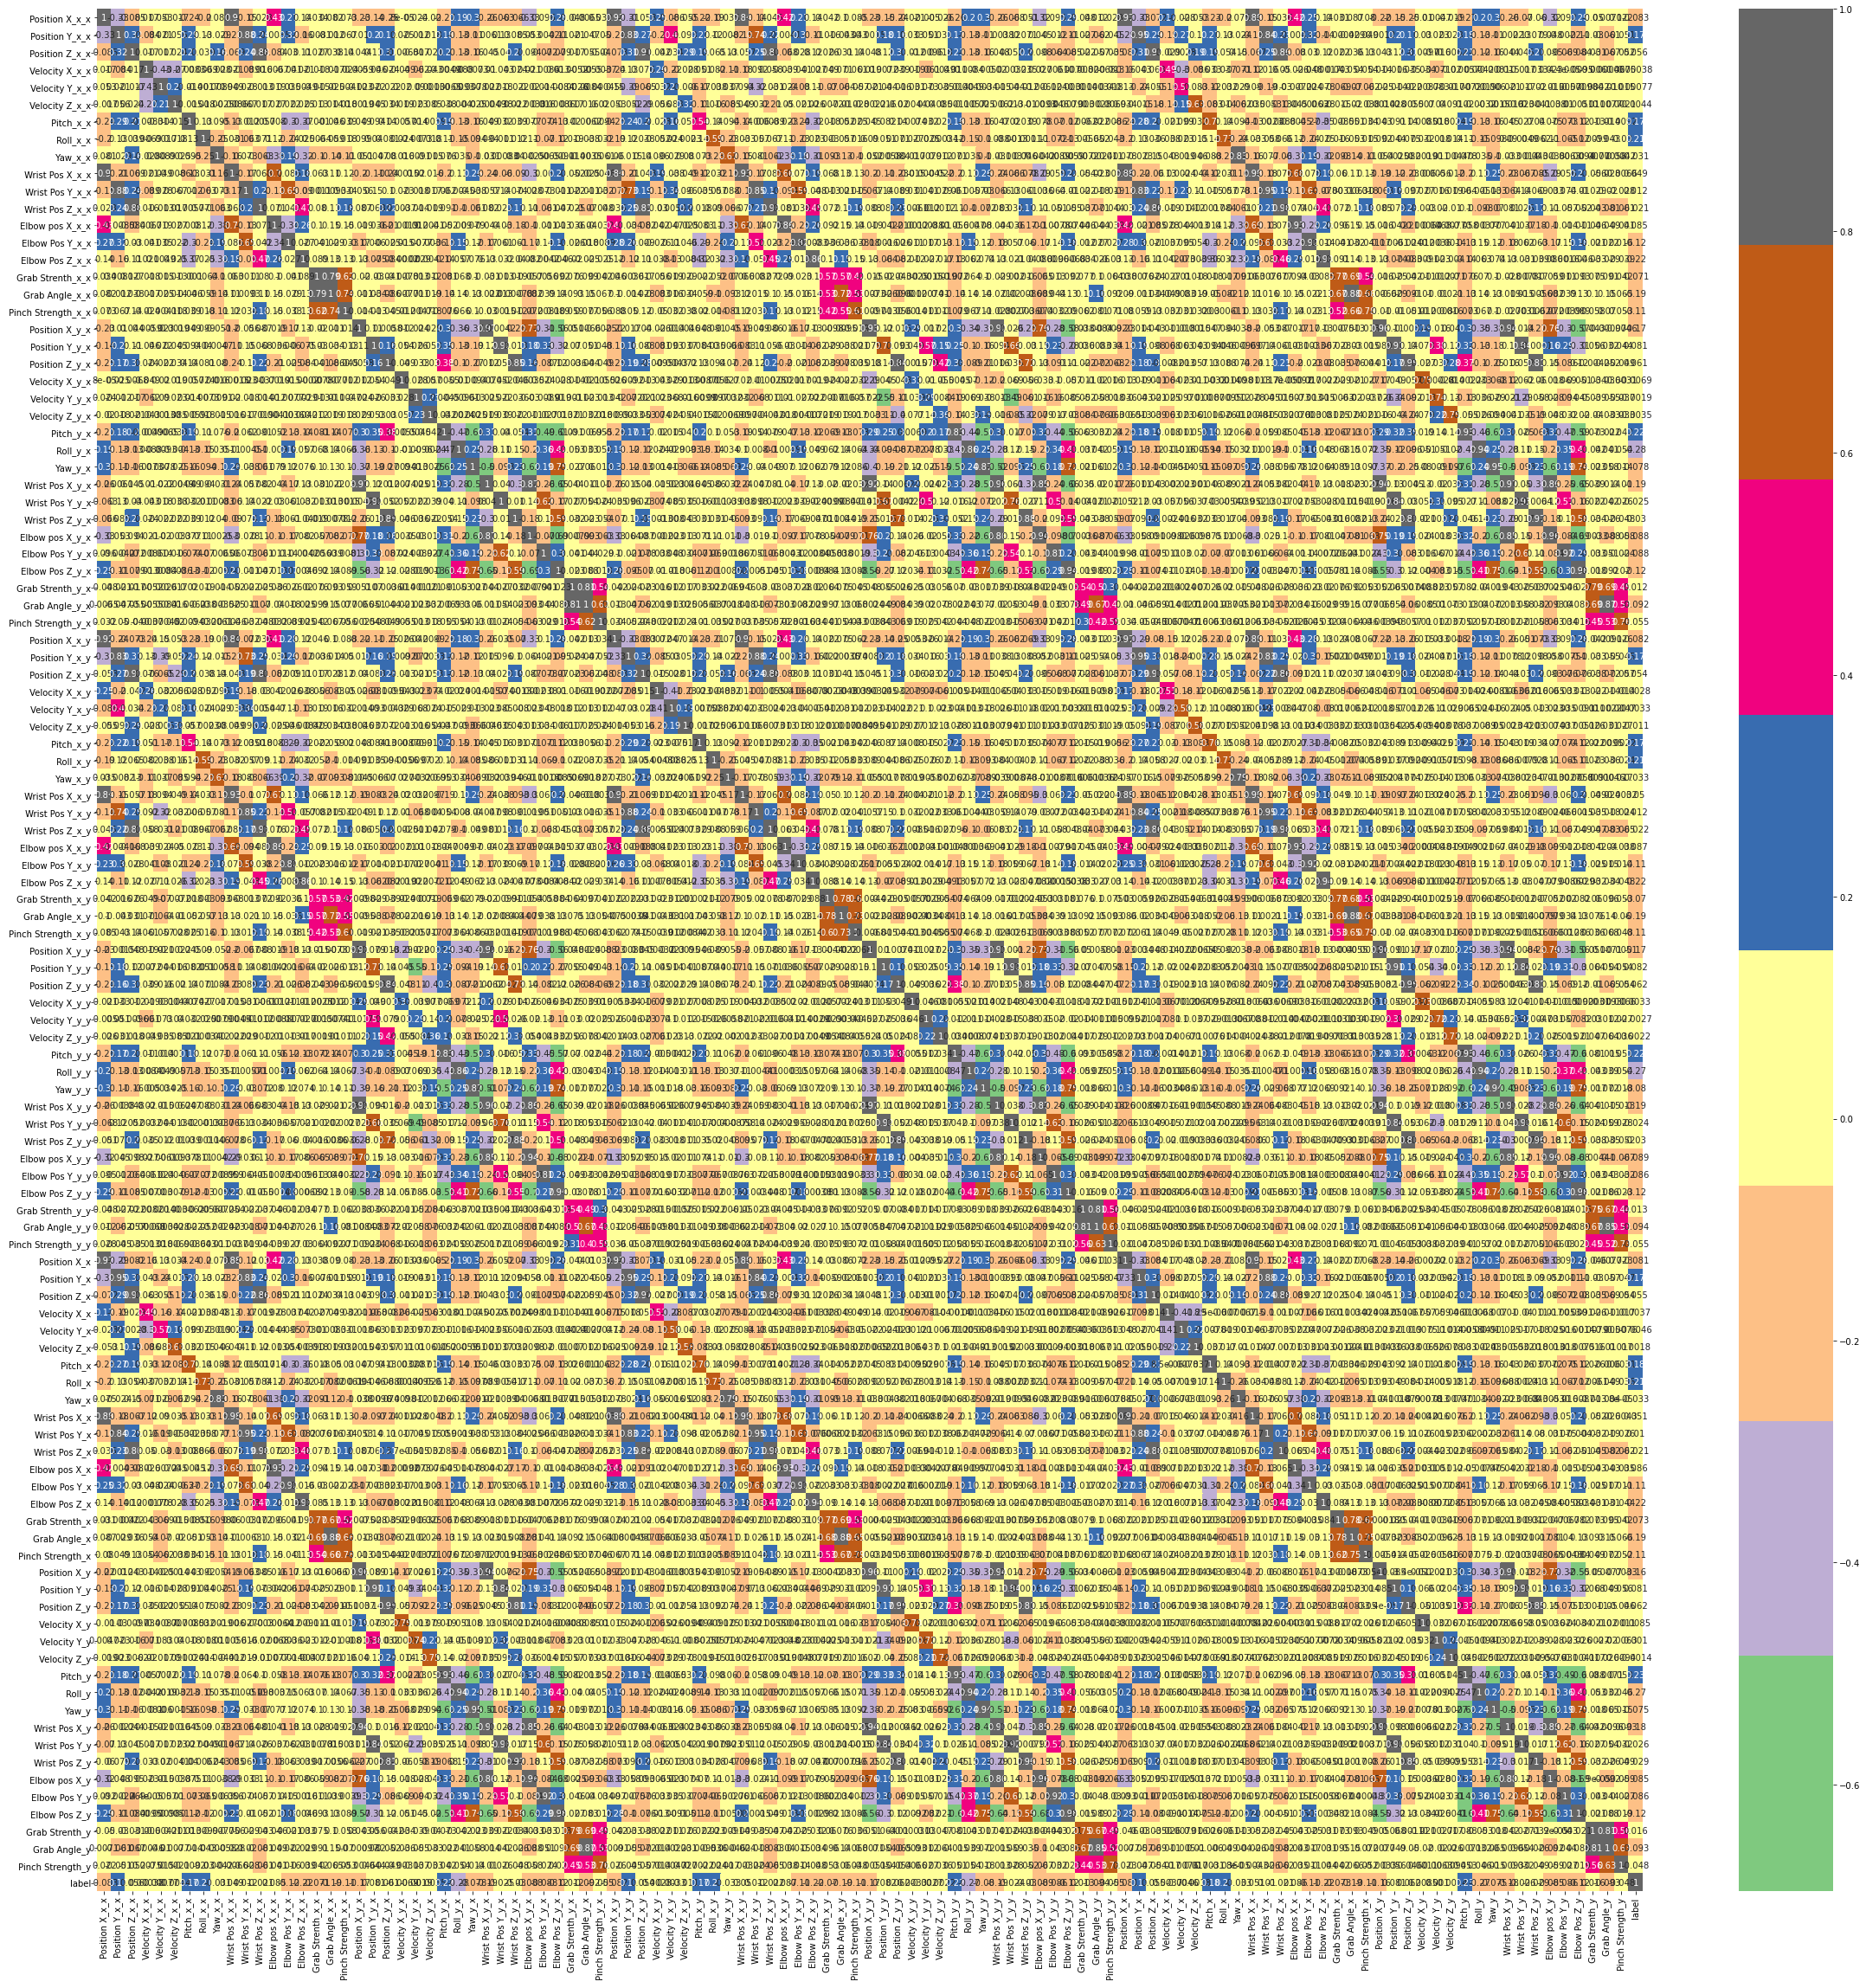

In [138]:
plt.figure(figsize=(40,40))
sns.heatmap(train.corr(),cmap="Accent",annot=True)
plt.show()

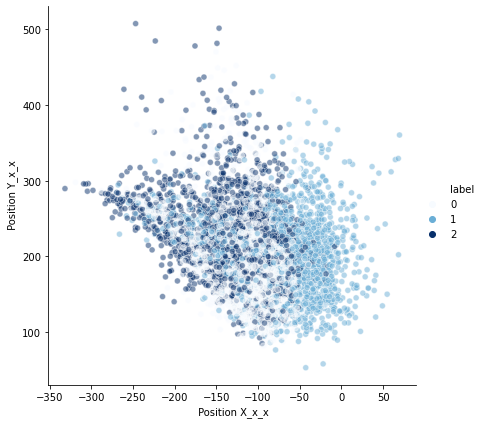

In [155]:
# The effect of Position X_x_x and Position Y_x_x on the label:
sns.relplot(x=" Position X_x_x", y=" Position Y_x_x", hue="label",sizes=(40, 400), alpha=.5, palette="Blues",height=6, data=train)

In [158]:
sns.displot(
    data=train, x=" Position X_x_x", y=" Position Y_x_x", col="label",
    log_scale=(True, False), col_wrap=4, height=6, aspect=.7, color='magenta'
)

AttributeError: module 'seaborn' has no attribute 'displot'

# Division of data:

In [93]:
x_train = train.drop(labels = ['label'], axis=1) # Division of the train
y_train = train.label

x_test = validation.drop(labels = ['label'], axis=1) # Division of the validation
y_test = validation.label

X2_test = test.drop(labels = ['label'], axis=1) # Division of the test
Y2_test = test.label

print (x_train.shape, x_test.shape, X2_test.shape)
print(y_train.shape, y_test.shape, Y2_test.shape)

(6556, 108) (855, 108) (2183, 108)
(6556,) (855,) (2183,)


# KNN

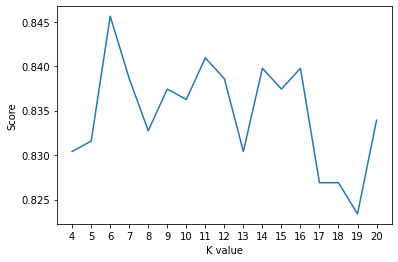

the maximum KNN score is: 84.56140350877193% while k=6


In [94]:
from sklearn.neighbors import KNeighborsClassifier
# A loop that checks what the best n_neighbors number is
arr = []
for i in range(4,21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    arr.append(accuracy_score(y_test, knn_predict))

# Graph showing accuracy    
plt.plot(range(4,21), arr)
plt.xticks(np.arange(4,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_accuracy = max(arr)*100
print ("the maximum KNN score is: " + str(maxS) + "% while k=6")

# Decision Tree:

In [95]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf_predict = clf.predict(x_test)
clf_accuracy = accuracy_score(y_test, clf_predict)*100
print ("Decision Tree accuracy: " + str(clf_accuracy) + "%")

Decision Tree accuracy: 81.75438596491227%


# Random Forest:

In [96]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=10)
ran.fit(x_train, y_train)
ran_predict = ran.predict(x_test)
ran_accuracy = accuracy_score(y_test, ran_predict)*100
print ("random forest accuracy: " + str(ran_accuracy) + "%")

random forest accuracy: 87.83625730994153%


# AdaBoost

In [97]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada.fit(x_train, y_train)
AdaBoostClassifier(n_estimators=1000, random_state=0)
ada_predict = ada.predict(x_test)
ada_accuracy = accuracy_score(y_test, ada_predict)*100
print ("AdaBoost accuracy: " + str(ada_accuracy) + "%")

AdaBoost accuracy: 75.20467836257309%


# XGBoost:

In [98]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(x_train, y_train)
xgb_predict = xgb.predict(x_test)
xgb_accuracy = accuracy_score(y_test, xgb_predict)*100
print ("XG Boost accuracy: " + str(xgb_accuracy) + "%")

XG Boost accuracy: 92.7485380116959%


# Stacking:

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
sta.fit(x_train, y_train)
sta_predict = sta.predict(x_test)
sta_accuracy = accuracy_score(y_test, sta_predict)*100
print ("Stacking accuracy: " + str(sta_accuracy) + "%")

Stacking accuracy: 85.49707602339181%


# Voting:

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
clf1 = KNeighborsClassifier(n_neighbors=6)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = XGBClassifier(eval_metric='mlogloss')
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vot.fit(x_train, y_train)
vot_predict = vot.predict(x_test)
vot_accuracy = accuracy_score(y_test, vot_predict)*100
print ("Voting accuracy: " + str(vot_accuracy) + "%")

Voting accuracy: 91.34502923976609%


# Pipeline:

In [116]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(x_train, y_train)
pip_predict = pip.predict(x_test)
pip_accuracy = accuracy_score(y_test, pip_predict)*100
print ("Pipeline accuracy: " + str(pip_accuracy) + "%")

Pipeline accuracy: 89.47368421052632%


# KMeans:

In [25]:
from sklearn.cluster import KMeans
kme = KMeans(n_clusters=10)
kme.fit(x_train, y_train)
kme_predict = kme.predict(x_test)
kme_accuracy = accuracy_score(y_test, kme_predict)*100
print ("KMeans accuracy: " + str(kme_accuracy) + "%")

KMeans accuracy: 3.3918128654970756%


# Comparison between the models:

Text(0, 0.5, 'Accuracy (%)')

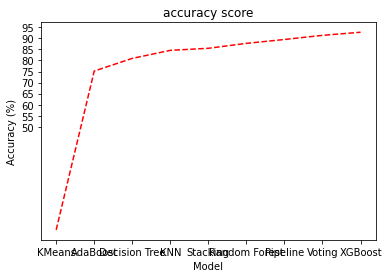

In [28]:
arrX = ['KMeans', 'AdaBoost','Decision Tree', 'KNN', 'Stacking', 'Random Forest', 'Pipeline', 'Voting', 'XGBoost']
arrY = [kme_accuracy, ada_accuracy, clf_accuracy, knn_accuracy, sta_accuracy, ran_accuracy, pip_accuracy, vot_accuracy, xgb_accuracy]
plt.plot (arrX, arrY, 'r--')
plt.title('accuracy score')
plt.yticks(np.arange(50,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")

I will show the confusion metrix of the 4 models with the best accuracies before pca:

# confusion_matrix before PCA:

In [117]:
from sklearn import metrics
ran_confusion = metrics.confusion_matrix(y_test, ran_predict)
pip_confusion = metrics.confusion_matrix(y_test, pip_predict)
vot_confusion = metrics.confusion_matrix(y_test, vot_predict)
xgb_confusion = metrics.confusion_matrix(y_test, xgb_predict)

0=Spontan 1=Alone 1=Sync


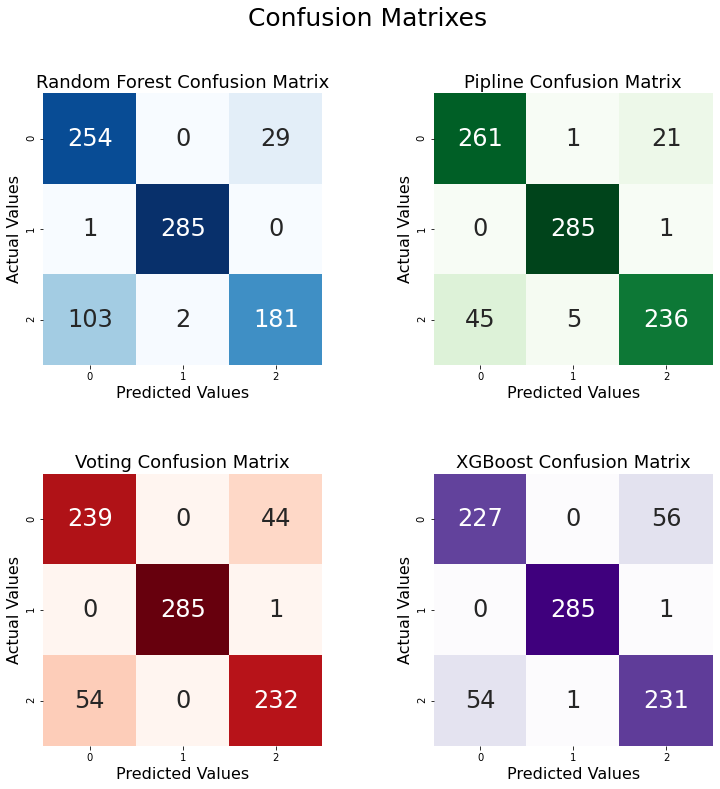

In [135]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("Pipline Confusion Matrix",fontsize=18)
sns.heatmap(pip_confusion,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

print("0=Spontan", "1=Alone", "1=Sync")

plt.show()

# PCA (cumsum)

In [123]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.99) + 1
pca = PCA(n_components=0.99)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [124]:
print (X_train.shape, X_test.shape) 

(6556, 29) (855, 29)


#### I will select the 5 models with the highest accuracy and check their accuracy after PCA:

## Stacking:

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]
sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
sta.fit(X_train, y_train)
sta_predict2 = sta.predict(X_test)
sta_accuracy2 = accuracy_score(y_test, sta_predict2)*100
print ("Stacking accuracy: " + str(sta_accuracy2) + "%")

Stacking accuracy: 83.9766081871345%


## Voting:

In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import tree
clf1 = KNeighborsClassifier(n_neighbors=6)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = XGBClassifier(eval_metric='mlogloss')
vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
vot.fit(X_train, y_train)
vot_predict2 = vot.predict(X_test)
vot_accuracy2 = accuracy_score(y_test, vot_predict2)*100
print ("Voting accuracy: " + str(vot_accuracy2) + "%")

Voting accuracy: 88.42105263157895%


## Random Forest:

In [127]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(max_depth=10)
ran.fit(X_train, y_train)
ran_predict2 = ran.predict(X_test)
ran_accuracy2 = accuracy_score(y_test, ran_predict2)*100
print ("random forest accuracy: " + str(ran_accuracy2) + "%")

random forest accuracy: 84.21052631578947%


## Pipeline:

In [128]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict2 = pip.predict(X_test)
pip_accuracy2 = accuracy_score(y_test, pip_predict2)*100
print ("Pipeline accuracy: " + str(pip_accuracy2) + "%")

Pipeline accuracy: 91.46198830409357%


## XGBoost:

In [129]:
import xgboost as xgb
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_predict2 = xgb.predict(X_test)
xgb_accuracy2 = accuracy_score(y_test, xgb_predict2)*100
print ("XGBoost accuracy: " + str(xgb_accuracy2) + "%")

XGBoost accuracy: 86.90058479532163%


# Comparison between the models after PCA and before:

Text(0, 0.5, 'Accuracy (%)')

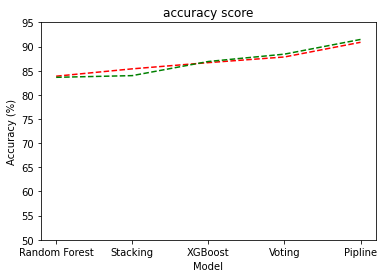

In [75]:
arrX = [ 'Random Forest', 'Stacking', 'XGBoost', 'Voting', 'Pipline']
arrY = [ran_accuracy, sta_accuracy, xgb_accuracy, vot_accuracy, pip_accuracy]
arrY2 = [ran_accuracy2, sta_accuracy2, xgb_accuracy2, vot_accuracy2, pip_accuracy2]
plt.plot (arrX, arrY, 'r--')
plt.plot (arrX, arrY2, 'g--')
plt.title('accuracy score')
plt.yticks(np.arange(50,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
# The red line shows the accuracy of the 5 best models before the pca.
# The green line shows the accuracy after the pca.
# It can be seen that after the pca there is no major change in accuracy, Therefore it is better to use pca 29.
# Right now the best model is Pipline.

I will show the confusion metrix of the 4 models with the best accuracies after pca:

# confusion_matrix after PCA 29:

In [131]:
from sklearn import metrics
ran_confusion2 = metrics.confusion_matrix(y_test, ran_predict2)
pip_confusion2 = metrics.confusion_matrix(y_test, pip_predict2)
vot_confusion2 = metrics.confusion_matrix(y_test, vot_predict2)
xgb_confusion2 = metrics.confusion_matrix(y_test, xgb_predict2)

0=Spontan 1=Alone 1=Sync


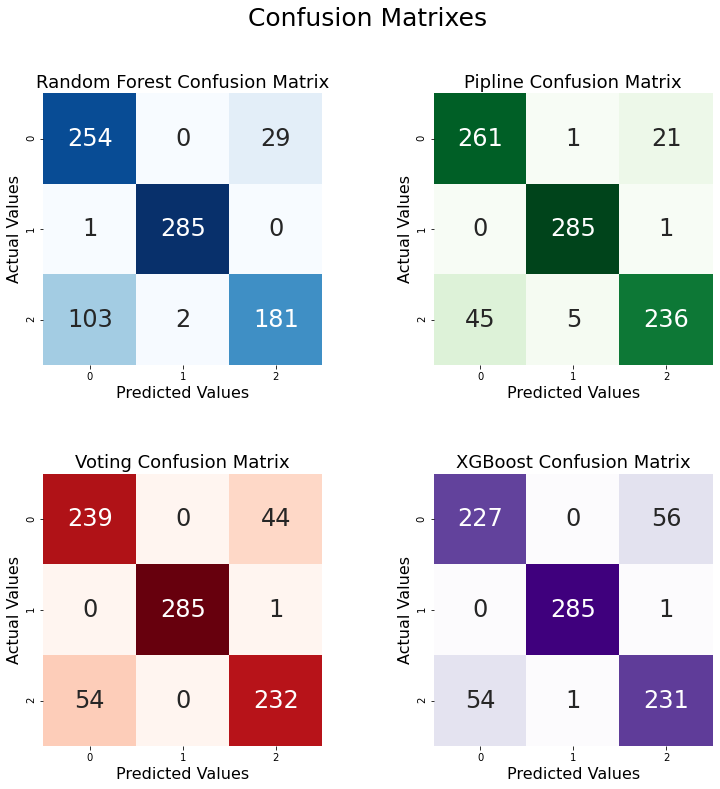

In [136]:
plt.figure(figsize=(12,12))

plt.suptitle("Confusion Matrixes",fontsize=25)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Random Forest Confusion Matrix",fontsize=18)
sns.heatmap(ran_confusion2,annot=True,cmap="Blues", fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,2)
plt.title("Pipline Confusion Matrix",fontsize=18)
sns.heatmap(pip_confusion2,annot=True,cmap="Greens",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,3)
plt.title("Voting Confusion Matrix",fontsize=18)
sns.heatmap(vot_confusion2,annot=True,cmap="Reds",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

plt.subplot(2,2,4)
plt.title("XGBoost Confusion Matrix",fontsize=18)
sns.heatmap(xgb_confusion2,annot=True,cmap="Purples",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel("Predicted Values",fontsize=16)
plt.ylabel("Actual Values",fontsize=16)

print("0=Spontan", "1=Alone", "1=Sync")

plt.show()

### I will check in a loop on each of these 5 models the PCA in the range 10-20:
#### To check if it is worth lowering the amount of columns and there will be an accuracy that is good

## Stacking:

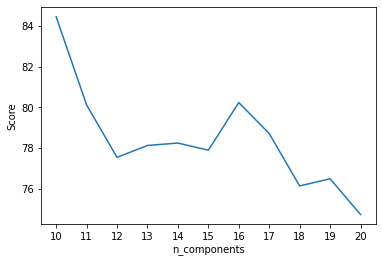

the maximum Stacking score is: 84.44444444444444% while n_components=10


In [48]:
arr = []
for i in range(10,21):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    sta = StackingClassifier(estimators = estimators, final_estimator=LogisticRegression())
    sta.fit(X_train, y_train)
    sta_predict = sta.predict(X_test)
    arr.append(accuracy_score(y_test, sta_predict)*100)

plt.plot(range(10,21), arr)
plt.xticks(np.arange(10,21,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

sta_pca = max(arr)
print ("the maximum Stacking score is: " + str(sta_pca) + "% while n_components=10")

## Voting:

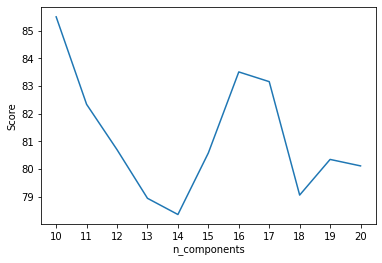

the maximum Voting score is: 85.49707602339181% while n_components=10


In [50]:
arr = []
for i in range(10,21):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    clf1 = KNeighborsClassifier(n_neighbors=6)
    clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
    clf3 = XGBClassifier(eval_metric='mlogloss')
    vot = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
    vot.fit(X_train, y_train)
    vot_predict = vot.predict(X_test)
    arr.append(accuracy_score(y_test, vot_predict)*100)

plt.plot(range(10,21), arr)
plt.xticks(np.arange(10,21,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

vot_pca = max(arr)
print ("the maximum Voting score is: " + str(vot_pca) + "% while n_components=10")

## Random Forest:

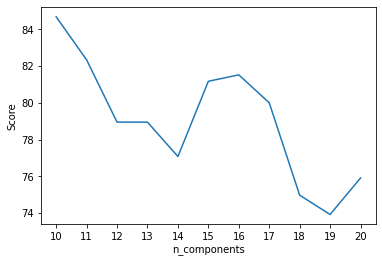

the maximum Random Forest score is: 84.67836257309942% while n_components=10


In [51]:
arr = []
for i in range(10,21):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    ran = RandomForestClassifier(max_depth=12)
    ran.fit(X_train, y_train)
    ran_predict = ran.predict(X_test)
    arr.append(accuracy_score(y_test, ran_predict)*100)

plt.plot(range(10,21), arr)
plt.xticks(np.arange(10,21,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

ran_pca = max(arr)
print ("the maximum Random Forest score is: " + str(ran_pca) + "% while n_components=10")

## Pipeline:

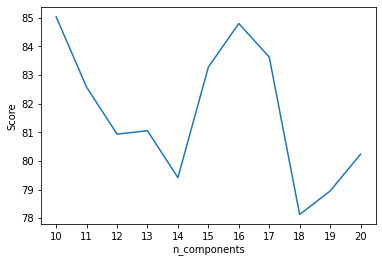

the maximum Pipeline score is: 85.02923976608187% while n_components=20


In [52]:
arr = []
for i in range(10,21):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    pip.fit(X_train, y_train)
    pip_predict = pip.predict(X_test)
    arr.append(accuracy_score(y_test, pip_predict)*100)

plt.plot(range(10,21), arr)
plt.xticks(np.arange(10,21,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

pip_pca = max(arr)
print ("the maximum Pipeline score is: " + str(pip_pca) + "% while n_components=20")

## XGBoost:

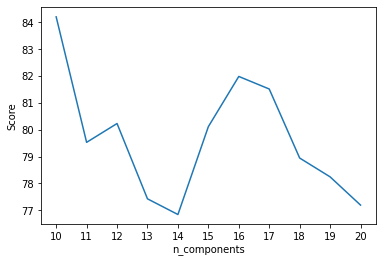

the maximum XGBoost score is: 84.21052631578947% while n_components=10


In [100]:
arr = []
for i in range(10,21):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    xgb = XGBClassifier(eval_metric='mlogloss')
    xgb.fit(X_train, y_train)
    xgb_predict = xgb.predict(X_test)
    arr.append(accuracy_score(y_test, xgb_predict)*100)

plt.plot(range(10,21), arr)
plt.xticks(np.arange(10,21,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

xgb_pca = max(arr)
print ("the maximum XGBoost score is: " + str(xgb_pca) + "% while n_components=10")

## Comparison between the models after PCA 29 and after lowest PCA:

Text(0, 0.5, 'Accuracy (%)')

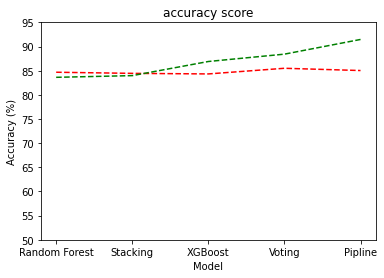

In [76]:
arrX = [ 'Random Forest', 'Stacking', 'XGBoost', 'Voting', 'Pipline']
arrY = [ran_pca, sta_pca, xgb_pca, vot_pca, pip_pca]
arrY2 = [ran_accuracy2, sta_accuracy2, xgb_accuracy2, vot_accuracy2, pip_accuracy2]
plt.plot (arrX, arrY, 'r--')
plt.plot (arrX, arrY2, 'g--')
plt.title('accuracy score')
plt.yticks(np.arange(50,100,5))
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
# The red line shows the accuracy of the 5 best models after pca 29.
# The green line shows the accuracy after smaller pca.
# It can be seen that the best accuracy when others reduce the pca is still 5% smaller than with pca 29.
# So I think it's worth staying with pca 29 and higher accuracy.

In conclusion, we will see the best model

In [77]:
pca = PCA(n_components = 29)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict = pip.predict(X_test)
pip_best = accuracy_score(y_test, pip_predict)*100
print ("the best model is Pipeline, his score is: " + str(pip_best) + "% while PCA=29")

the best model is Pipeline, his score is: 91.46198830409357% while PCA=29


In [ ]:
We will now test this model on our final test:

In [108]:
pca = PCA(n_components = 29)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(X2_test)
explained_variance = pca.explained_variance_ratio_
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(X_train, y_train)
pip_predict = pip.predict(X_test)
pip_best = accuracy_score(Y2_test, pip_predict)*100
print ("the best model is Pipeline, his score is: " + str(pip_best) + "% while PCA=29")

the best model is Pipeline, his score is: 85.29546495648191% while PCA=29


It can be seen that the accuracy of the final test is 6% lower than the accuracy of validation.
Maybe because in validation we only took one file of each type of label and the test has 3 of each type.
#### Therefore I will also check the accuracy on this model without pca:

In [109]:
pip = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pip.fit(x_train, y_train)
pip_predict = pip.predict(X2_test)
pip_best = accuracy_score(Y2_test, pip_predict)*100
print ("the best model is Pipeline, his score is: " + str(pip_best) + "%")

the best model is Pipeline, his score is: 87.26523133302794%


When making the model without pca the accuracy is 2% higher.
So it depends on what you prefer, a model with higher accuracy but a little less efficient or a model with higher efficiency and lower accuracy.